# BioLGCA - A Mesosocopic Modelling Framework for Collective Phenomena

## Introduction
This Juypter notebook serves as an introduction to the BioLGCA python package. It consists of lattice-gas cellular automaton models for biological systems in 1D and 2D, which can be adapted, simulated and analyzed. First, visualization and simulation methods are introduced. Next, already implemented LGCA models are presented and analyzed. We conclude with a demonstration on how to code and use your own interactions in the BioLGCA framework.

## Class initialization
### Calling the class
To envoke the package and obtain the appropriate class instance, the function `get_lgca` of the `base.py` module is used

In [1]:
# we use inline plotting and switch to the 'notebook' backend later to show animations
%matplotlib inline  
from lgca import get_lgca
lgca = get_lgca(geometry='hex')

Random walk interaction is used.


### Setting an interaction
Note that we did not specify the lattice dimensions or an interaction rule, so the default parameters are used, which is a random walk on a hexagonal lattice. We can set specific interactions using `interaction=`, the lattice dimensions using `dims=`, boundary conditions with `bc=`, and interaction parameters and more using keyword arguments. 

In [2]:
lgca = get_lgca(geometry='hex', dims=(10, 10), interaction='aggregation')

sensitivity set to beta =  2.0


We now used the aggregation rule, which uses a sensitivity parameter `beta`, which is set to 2 by default. All available interactions can be printed using the class method `get_interactions`.

In [3]:
lgca.get_interactions()

['go_and_grow', 'go_or_grow', 'alignment', 'aggregation', 'random_walk', 'excitable_medium', 'nematic', 'persistant_motion', 'chemotaxis', 'contact_guidance']


The interaction can also be changed after initialization using the `set_interaction` method:

In [4]:
lgca.set_interaction(interaction='alignment', beta=3.0)

### Setting the initial state
By default, the initial state is a homogeneous state with constant mean density, that can be set using the `density` keyword. For `density = 0.1` every channel on the lattice is occupied with a probability of $0.1$. The state of the lgca class instance is saved in the array `nodes`. For example, for a 1D LGCA of size 5, without rest channels and with a homogeneous initial state, where each channel is occupied with a probability $\rho = 0.1$, we use

In [5]:
lgca = get_lgca(restchannels=0, density=0.1, dims=5, geometry='lin', bc='refl')

Random walk interaction is used.


We can print the current state as

In [6]:
lgca.print_nodes()

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Simulating the system
A single time step without recording is performed with the `timestep` method:

In [7]:
lgca.timestep()
lgca.print_nodes()

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


To simulate the dynamics for longer times and record the steps we use the class method `timeevo`. It takes the keyword arguments `timesteps`, that sets the number of time steps to simulate. Also, all configurations can be recorded using `record=True`. To only record the density profile set `recorddens=True`. The total number of cells can be recorded with `recordN=True`, which is also the default.

In [8]:
lgca.timeevo(timesteps=100)
lgca.print_nodes()

Progress: [####################] 100% Done...
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Visualization
Visualization and plotting are different for 1D and 2D lattice geometries. The following section only applies to the 2D lattices, and the 1D equivalent is mentioned later. 
### Plotting
#### Density profile
The python package offers several methods to visualize LGCA states. A simple method is plotting the current density profile $$n(r,k) = \sum_i s_i (r,k).$$ Consider a LGCA on a square lattice,

Random walk interaction is used.


(<Figure size 800x700 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x7f54e23af040>)

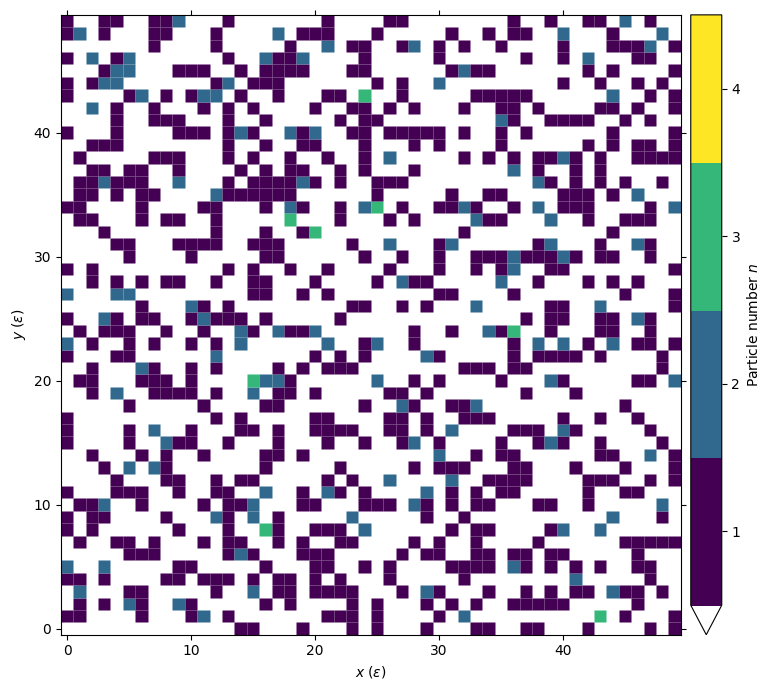

In [9]:
lgca = get_lgca(geometry='square')
lgca.plot_density()

#### Flux
Sometimes it is more useful to plot the local flux $$ \mathbf{J}(r,k) = \sum_i s_i(r,k) \mathbf{c_i}. $$ This can be achieved like follows:

(<Figure size 800x700 with 2 Axes>,
 <matplotlib.cm.ScalarMappable at 0x7f54e2005610>)

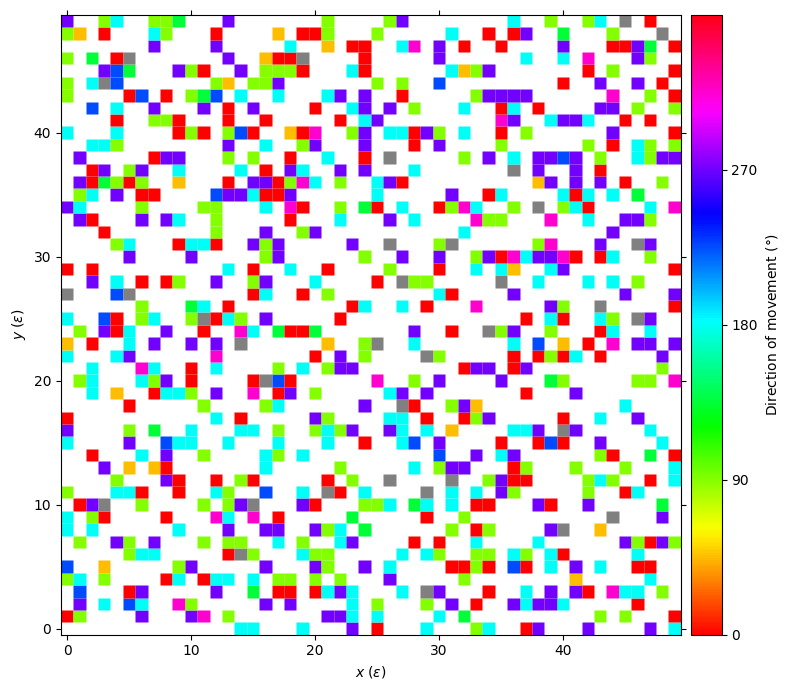

In [10]:
lgca.plot_flux()

Alternatively it is possible to plot a corresponding flow field:

(<Figure size 800x800 with 1 Axes>,
 <matplotlib.quiver.Quiver at 0x7f54e1fb23a0>)

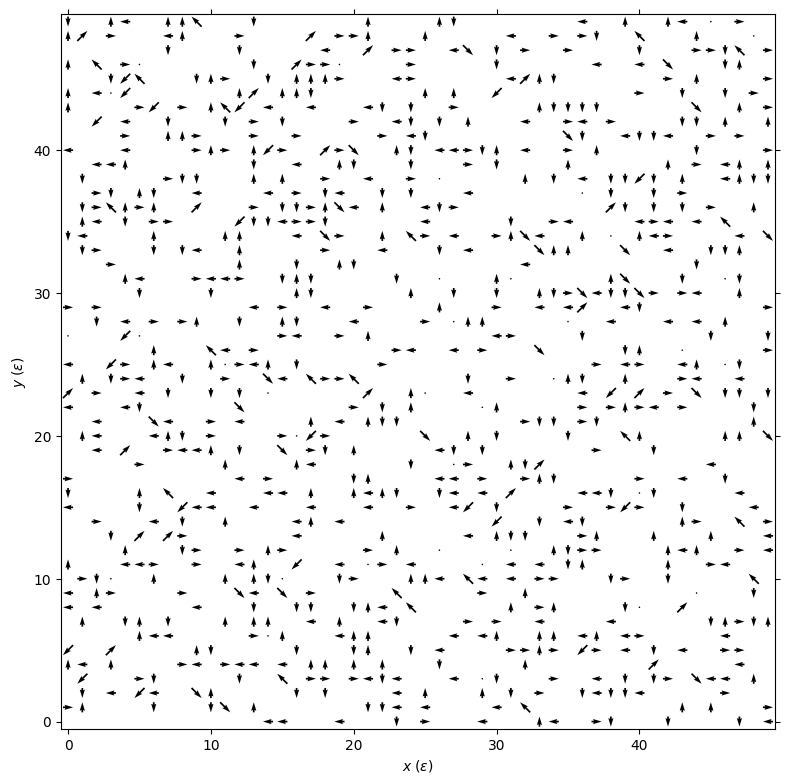

In [11]:
lgca.plot_flow()

#### Full configuration
For sketches, it is sometimes useful to plot the full lattice configuration. This is only advisable on small lattices. See the following example. Notice that the rest channels are depicted as circles, filled by a number, indicating the number of filled rest channels, while the occupied velocity channels are showns as black arrows.

[[[1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 1.]]]
Random walk interaction is used.


(<Figure size 800x800 with 1 Axes>,
 [Text(0.0, -0.08838834764831843, '2'),
  Text(0.0, 0.9116116523516815, '0'),
  Text(1.0, -0.08838834764831843, '0'),
  Text(1.0, 0.9116116523516815, '2')])

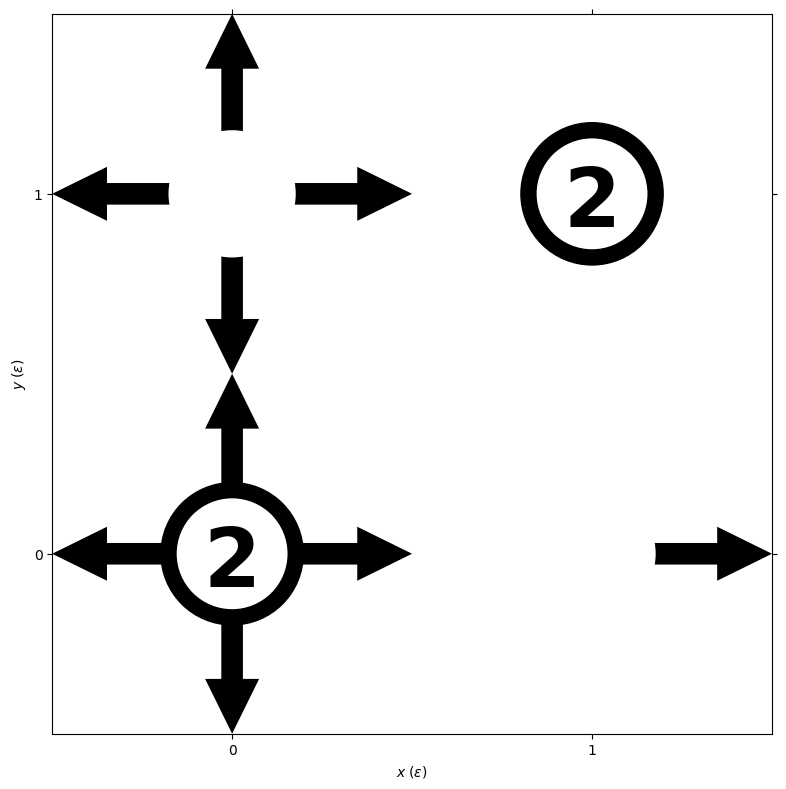

In [12]:
import numpy as np
nodes = np.zeros((2, 2, 6))
nodes[0, 0, :] = 1
nodes[1, 1, 4:] = 1
nodes[0, 1, :4] = 1
nodes[1, 0, 0] = 1
print(nodes)
lgca = get_lgca(geometry='square', density=0.25, nodes=nodes)
lgca.plot_config()
#

### Animation of dynamics
After recording configurations with the `timeevo` method, we can animate the dynamics (or plot it in a 2D plot, in the case of a 1D lattice).

In [13]:
lgca = get_lgca(geometry='hex', interaction='aggregation', dims=(10, 10), restchannels=1)
lgca.timeevo(record=True)

sensitivity set to beta =  2.0
Progress: [####################] 100% Done...


To animate the density we use the `animate_density` method like follows

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


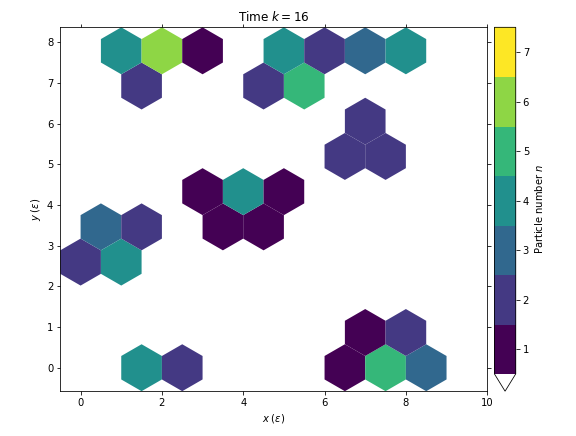

In [15]:
lgca.animate_density()

Similarly, we can animate the flux, flow, and configuration:

The underlying lattice can be plotted using the keyword `edgecolor=color`, where `color`is the color of your choise as a string.

In [16]:
lgca.animate_flux(interval=100, edgecolor='k')

In [17]:
lgca.animate_flow()

The full configuration can also be animated. The keyword `grid` allows to turn on and off the visualization of the underlaying lattice grid.

In [18]:
lgca.animate_config()

### Live animations
Using the same logic as before, we can also animate the system on-the-fly. This is especially useful during interaction design and debugging.

In [19]:
lgca.live_animate_density()

In [20]:
lgca.set_interaction(interaction='alignment')
ani = lgca.live_animate_flux()

(10, 10, 7)
sensitivity set to beta =  2.0


We can also change the boundary conditions, e.g. we change from the default periodic boundaries to reflecting boundaries here.

In [21]:
lgca.set_bc('refl')
lgca.live_animate_config()

(10, 10, 7)


## Examples
### Alignment

In [22]:
lgca = get_lgca(geometry='hex', interaction='alignment', bc='refl')
lgca.live_animate_flux()

sensitivity set to beta =  2.0


### Aggregation

In [23]:
lgca = get_lgca(interaction='aggregation', density=0.5, restchannels=3)
lgca.live_animate_density()

(10, 10, 6)
sensitivity set to beta =  2.0


### Nematic interaction

In [26]:
lgca = get_lgca(interaction='nematic')
lgca.live_animate_flux()

sensitivity set to beta =  2.0


<IPython.core.display.Javascript object>

### Chemotaxis
In this interaction, cells have a migration bias towards the source of a chemoattractant that was placed in the middle of the lattice.

In [27]:
lgca = get_lgca(interaction='chemotaxis')
lgca.live_animate_density()

sensitivity set to beta =  5.0


<IPython.core.display.Javascript object>

### Persistent movement

In [28]:
lgca = get_lgca(interaction='persistent_motion', beta=5)
lgca.nodes[...] = 0
lgca.update_dynamic_fields()
lgca.nodes[10, 10, 1] = 1
lgca.live_animate_density()

<IPython.core.display.Javascript object>

### Nematic contact guidance
Here, cells have a tendency to migrate more along the $x$ axis than along the $y$ axis.

In [29]:
lgca = get_lgca(interaction='contact_guidance')
lgca.nodes[...] = 0
lgca.update_dynamic_fields()
lgca.nodes[20:31, 20:31, :] = 1
lgca.live_animate_density()

sensitivity set to beta =  2.0


<IPython.core.display.Javascript object>

### Go and grow

In [18]:
lgca = get_lgca(interaction='go_and_grow', restchannels=6)
lgca.nodes[...] = 0
lgca.update_dynamic_fields()
lgca.nodes[lgca.lx//2, lgca.ly//2, -1] = 1
lgca.live_animate_density()

birth rate set to r_b =  0.2


AttributeError: 'FigureManagerNbAgg' object has no attribute 'web_sockets'

### Go or grow

In [23]:
lgca = get_lgca(interaction='go_or_grow', restchannels=4, kappa=1., dims=(40, 40),geometry='square')  # change parameter kappa from 4 to -4; what happens?
lgca.nodes[...] = 0
lgca.update_dynamic_fields()
lgca.nodes[lgca.lx//2, lgca.ly//2, :] = 1
lgca.timeevo(timesteps=2)
lgca.plot_density()
print(sum(sum(lgca.cell_density)))
# lgca.dens_t()
# lgca.live_animate_density()

(10, 10, 7)
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
switch threshold set to theta =  0.75
Progress: [####################] 100% Done...
9


### Excitable medium

In [24]:
lgca = get_lgca(interaction='excitable_medium', restchannels=20, N=20, bc='refl')
lgca.nodes[...] = 0
lgca.nodes[:lgca.lx//2, :, :lgca.velocitychannels] = 1
lgca.nodes[:, :lgca.ly//2, lgca.velocitychannels:] = 1
lgca.live_animate_density(channels=slice(0, lgca.velocitychannels), vmax=lgca.velocitychannels)

(10, 10, 7)
alignment sensitivity set to beta =  0.05
aggregation sensitivity set to alpha =  1.0


## Using a custom interaction rule
Here, we will show how to use your own interaction rule, without changing the source code of the python package. The interaction rule should have the syntax `interaction(lgca)`, where `lgca` is an instance of any LGCA class, and it should change the attribute `lgca.nodes` to the post-interaction state. In this example, we will design a rule, that will make the particles align OR let the form aggregates.

In [25]:
from bisect import bisect_left
from random import random


def rest_or_align(lgca):
    newnodes = np.zeros_like(lgca.nodes)
    resting = lgca.nodes[..., lgca.velocitychannels:].sum(-1)
    resting = lgca.nb_sum(resting)  # calc surrounding number of occupied rest channels for each node
    g = lgca.calc_flux(lgca.nodes)  
    g = lgca.nb_sum(g)  # calc cumulative flux around each node
    relevant = (lgca.cell_density[lgca.nonborder] > 0) & (lgca.cell_density[lgca.nonborder] < lgca.K)
    coords = [a[relevant] for a in lgca.nonborder]  # get relevant coordinates, to increase performance
    for coord in zip(*coords):
        n = lgca.cell_density[coord]
        permutations = lgca.permutations[n]  # pre-calculated unique permutations for cell number n
        j = lgca.j[n]  # and respective fluxes
        n_rest = permutations[:, lgca.velocitychannels:].sum(-1)  # and respective resting particles (could also be pre-calculated to speed up)
        weights = np.exp(lgca.beta * np.einsum('i,ij', g[coord], j) + lgca.alpha * n_rest * resting[coord]).cumsum()
        ind = bisect_left(weights, random() * weights[-1])
        newnodes[coord] = permutations[ind]
        
    lgca.nodes = newnodes

lgca = get_lgca(interaction='alignment', restchannels=1)
lgca.alpha = 2.5  # set the required alpha parameter as class attribute; here, a higher alpha value increases the tendency to form aggregates
lgca.interaction = rest_or_align  # set the interaction function

(10, 10, 7)
(50, 50, 6)
sensitivity set to beta =  2.0


In [26]:
lgca.live_animate_flux()
#lgca.timestep()

(50, 50, 6)
(10, 10, 7)


In [27]:
import numpy as np 

nodes = np.zeros((2, 2, 6))
nodes[0, 0, :] = 1
nodes[0, 1, :4] = 1
nodes[1, 0, 0] = 1
nodes[1, 1, 4:] = 1


print(nodes)

lgca = get_lgca(interaction='go_or_grow', restchannels=4, kappa=1., nodes=nodes,geometry='square')  # change parameter kappa from 4 to -4; what happens?
lgca.print_nodes()
lgca.timeevo(timesteps=1)
lgca.plot_density()
lgca.print_nodes()
sum(sum(lgca.nodes.sum(-1)))/4

[[[1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 0. 0.]]

 [[1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 1.]]]
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
switch threshold set to theta =  0.75
[[[0 0 0 0 1 1]
  [1 0 0 0 0 0]
  [0 0 0 0 1 1]
  [1 0 0 0 0 0]]

 [[1 1 1 1 0 0]
  [1 1 1 1 1 1]
  [1 1 1 1 0 0]
  [1 1 1 1 1 1]]

 [[0 0 0 0 1 1]
  [1 0 0 0 0 0]
  [0 0 0 0 1 1]
  [1 0 0 0 0 0]]

 [[1 1 1 1 0 0]
  [1 1 1 1 1 1]
  [1 1 1 1 0 0]
  [1 1 1 1 1 1]]]
Progress: [####################] 100% Done...
[[[0 0 1 1 1 0]
  [1 0 1 0 0 0]
  [0 0 1 1 1 0]
  [1 0 1 0 0 0]]

 [[1 1 0 1 1 0]
  [0 1 0 1 1 1]
  [1 1 0 1 1 0]
  [0 1 0 1 1 1]]

 [[0 0 1 1 1 0]
  [1 0 1 0 0 0]
  [0 0 1 1 1 0]
  [1 0 1 0 0 0]]

 [[1 1 0 1 1 0]
  [0 1 0 1 1 1]
  [1 1 0 1 1 0]
  [0 1 0 1 1 1]]]


13.0

In [28]:
lgca.nodes

(50, 50, 6)
(10, 10, 7)


array([[[False, False,  True,  True,  True, False],
        [ True, False,  True, False, False, False],
        [False, False,  True,  True,  True, False],
        [ True, False,  True, False, False, False]],

       [[ True,  True, False,  True,  True, False],
        [False,  True, False,  True,  True,  True],
        [ True,  True, False,  True,  True, False],
        [False,  True, False,  True,  True,  True]],

       [[False, False,  True,  True,  True, False],
        [ True, False,  True, False, False, False],
        [False, False,  True,  True,  True, False],
        [ True, False,  True, False, False, False]],

       [[ True,  True, False,  True,  True, False],
        [False,  True, False,  True,  True,  True],
        [ True,  True, False,  True,  True, False],
        [False,  True, False,  True,  True,  True]]])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
death rate

<IPython.core.display.Javascript object>


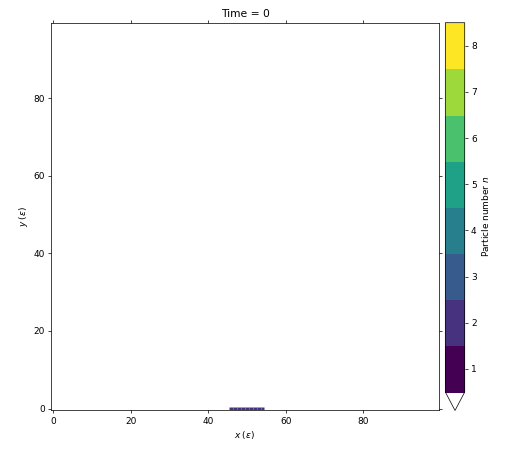

<IPython.core.display.Javascript object>


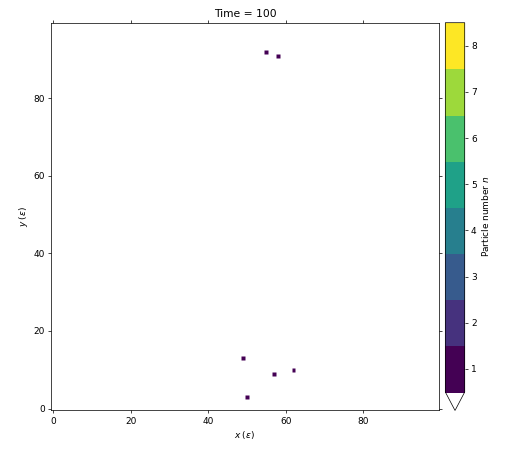

<IPython.core.display.Javascript object>


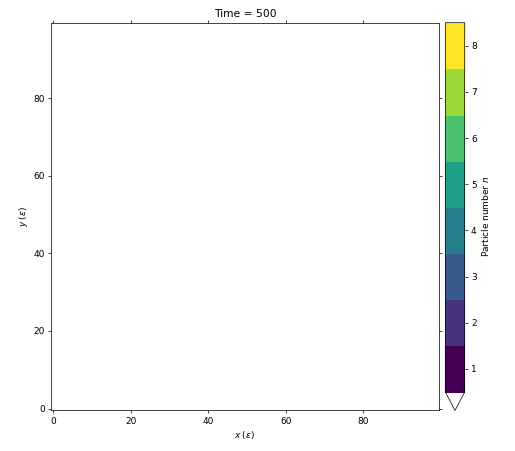

<IPython.core.display.Javascript object>


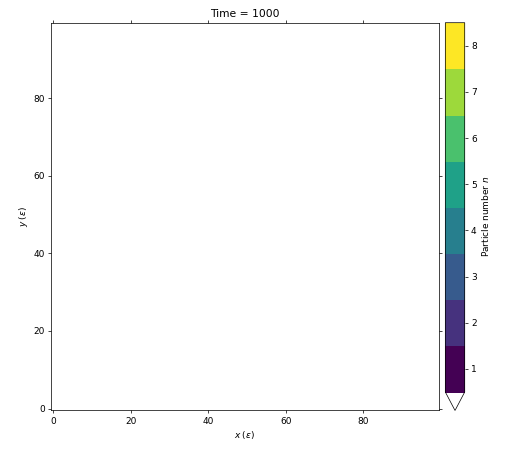

In [106]:
import numpy as np 
import matplotlib.pyplot as plt


nodes = np.zeros((100,100,8))
# specify circle parameters: centre ij and radius
ci,cj=50,50
cr=5

# Create index arrays to z
I,J=np.meshgrid(np.arange(nodes.shape[0]),np.arange(nodes.shape[1]))

# calculate distance of all points to centre
dist=np.sqrt((I-ci)**2+(J-cj)**2)

# Assign value of 1 to those points where dist<cr:
nodes[np.where(dist<cr)]=1


# print(nodes)

lgca = get_lgca(interaction='go_or_grow', restchannels=4, kappa=4.4, nodes=nodes,geometry='square')  # change parameter kappa from 4 to -4; what happens?
# lgca.print_nodes()
lgca.timeevo(timesteps=1000)
# lgca.plot_density()
# lgca.plot_density(channels=list(range(0, 4)))
# lgca.print_nodes()
# sum(lgca.nodes.sum(-1))
# lgca.dens_t[0].sum()


plt.figure()
x = lgca.plot_density(lgca.dens_t[0])[1] # plot density timeframe
plt.title('Time = 0')
plt.show()
plt.figure()
y = lgca.plot_density(lgca.dens_t[100])[0]
title = plt.title('Time = 100')
plt.show()
plt.figure()
z = lgca.plot_density(lgca.dens_t[500])[0]
title = plt.title('Time = 500')
plt.show()
plt.figure()
z = lgca.plot_density(lgca.dens_t[1000])[0]
title = plt.title('Time = 1000')





In [175]:
import numpy as np 
import matplotlib.pyplot as plt

# specify circle parameters: centre ij and radius
nodes = np.zeros((100,100,8))
ci,cj=50,50
cr=2

# Create index arrays to z
I,J=np.meshgrid(np.arange(nodes.shape[0]),np.arange(nodes.shape[1]))

# calculate distance of all points to centre
dist=np.sqrt((I-ci)**2+(J-cj)**2)

# Assign value of 1 rest and moving to those points where dist<cr:
l=np.where(dist<cr)
k_1=np.ones(len(l[0]), dtype=int)
k_2=np.ones(len(l[0]), dtype=int)*4
new_1 = (*l, k_1)
new_2 = (*l, k_2)
nodes[new_1] = 1
nodes[new_2] = 1


#Run simulation over Kappa and Theta

arr = []
arr_k = []
for kappa, i in zip(np.arange(-8, 8.1, 0.1), range(0,200)):
    arr_k.append(kappa)
    arr.append([])
    kappa = round(kappa,1)
    arr_i = []
    for theta, j in zip(np.arange(0, 1.04, 0.05), range(0,30)): 
        #new lattice
        nodes = np.zeros((100,100,8))
        nodes[np.where(dist<cr),0,0]=1
        nodes[np.where(dist<cr),0,4]=1
        #run
        theta = round(theta,2)
        arr_i.append(theta)
        lgca = get_lgca(interaction='go_or_grow', restchannels=4, kappa=kappa, theta=theta, nodes=nodes, 
                        geometry='square')
        lgca.timeevo(timesteps=5)
        arr[i].append(lgca.nodes[:,:,4:].sum()) #summing rest cells
print(arr)
print(arr_k)
print(arr_i)
print(np.flipud(arr))
print(arr.size)


death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

AttributeError: 'list' object has no attribute 'size'

In [4]:
#Figure 2 CLEAN
import numpy as np 
import matplotlib.pyplot as plt

# specify circle parameters: centre ij and radius
nodes = np.zeros((100,100,8))
ci,cj=50,50
cr=10

# Create index arrays to z
I,J=np.meshgrid(np.arange(nodes.shape[0]),np.arange(nodes.shape[1]))

# calculate distance of all points to centre
dist=np.sqrt((I-ci)**2+(J-cj)**2)

# Assign value of 1 rest and moving to those points where dist<cr:
l=np.where(dist<cr)
k_1=np.ones(len(l[0]), dtype=int)
k_2=np.ones(len(l[0]), dtype=int)*4
new_1 = (*l, k_1)
new_2 = (*l, k_2)
nodes[new_1] = 1
nodes[new_2] = 1


#Run simulation over Kappa and Theta

arr = []
# arr_k = []
for kappa, i in zip(np.arange(-8, 8.1, 0.1), range(0,200)):
#     arr_k.append(kappa)
    arr.append([])
    kappa = round(kappa,1)
#     arr_i = []
    for theta, j in zip(np.arange(0, 1.04, 0.05), range(0,30)): 
        #new lattice
        nodes = np.zeros((100,100,8))
        nodes[new_1] = 1
        nodes[new_2] = 1
        #run
        theta = round(theta,2)
#         arr_i.append(theta)
        lgca = get_lgca(interaction='go_or_grow', restchannels=4, kappa=kappa, theta=theta, nodes=nodes, 
                        geometry='square')
        lgca.timeevo(timesteps=100)
        arr[i].append(lgca.nodes[:,:,4:].sum()) #summing rest cells

n_r_k_theta = np.flipud(arr)

print("Done!")

death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

In [6]:
from tempfile import TemporaryFile

outfile = TemporaryFile()
np.save(outfile, n_r_k_theta)

In [11]:
import scipy.io
import numpy as np
file_path = 'data.mat'
scipy.io.savemat(file_path, {'data': n_r_k_theta})

In [12]:
n_r_k_theta

array([[1184, 1217, 1285, ...,    0,    0,    0],
       [1158, 1162, 1277, ...,    0,    0,    0],
       [1207, 1232, 1266, ...,    0,    0,    0],
       ...,
       [  84,  201,  455, ..., 1314, 1224, 1194],
       [  86,  188,  447, ..., 1287, 1211, 1193],
       [  68,  204,  487, ..., 1298, 1211, 1185]])

In [13]:
np.save('n_r_k_theta', n_r_k_theta)

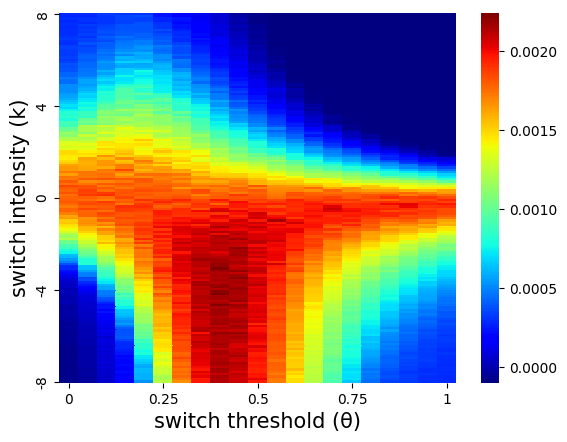

In [30]:
#Figure 2 heatmap!
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt


n_r_k_theta = np.load('outfile_name.npy')
i_n_r = 305
growth_rate = (n_r_k_theta - i_n_r) / i_n_r 
growth_rate = growth_rate/10000 #divide number of nodes
sns.color_palette("viridis", as_cmap=True)
ax = sns.heatmap(growth_rate,xticklabels=5, yticklabels=40, cmap="jet")
ax.set_yticklabels([8, 4, 0, -4, -8])
ax.set_xticklabels([0,0.25,0.5,0.75,1])
plt.xlabel('switch threshold (θ)', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('switch intensity (k)', fontsize = 15) # y-axis label with fontsize 15

plt.show()

In [16]:
#Figure 3


In [123]:
#Figure 3 CLEAN
import numpy as np 
import matplotlib.pyplot as plt

ext_all = []
den_all = []
for rad in range(7,15):
    # specify circle parameters: centre ij and radius
    L = 100
    K = 8
    nodes = np.zeros((L,L,K))
    ci,cj=50,50
    
    # Create index arrays to z
    I,J=np.meshgrid(np.arange(nodes.shape[0]),np.arange(nodes.shape[1]))

    # calculate distance of all points to centre
    dist=np.sqrt((I-ci)**2+(J-cj)**2)
    
    # Assign value of 1 rest and moving to those points where dist<rad:
    l=np.where(dist<rad)
    k_1=np.ones(len(l[0]), dtype=int)
    k_2=np.ones(len(l[0]), dtype=int)*4
    new_1 = (*l, k_1)
    new_2 = (*l, k_2)
    nodes[new_1] = 1
    nodes[new_2] = 1
    
    #init density
    nodes_2 = np.sum(nodes, axis = 2)
    nodes_2 = nodes_2/K
    init_den = nodes_2.sum()/(L*L)
    den_all.append(init_den)
    
    init_n = nodes.sum()
    ext = 0
    iterations = 10
    for ite in range(iterations):
            lgca = get_lgca(interaction='go_or_grow', restchannels=4, kappa=4.4, theta=0.75, nodes=nodes, 
                    geometry='square')
            lgca.timeevo(timesteps=100)
            n = lgca.nodes.sum()
            if n<350:
                ext += 1
    ext_perc = (ext/iterations) * 100
    ext_all.append(ext_perc)
    
print(ext_all)
print(den_all)
            


death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
[100.0, 100.0, 100.0, 100.0, 40.0, 0.0, 0.0, 0.0]
[0.003625, 0.004825, 0.006225, 0.007625, 0.009325, 0.010925, 0.012925, 0.015225]


In [54]:
n_m = lgca.nodes[..., :lgca.velocitychannels].sum()
n_r = lgca.nodes[..., lgca.velocitychannels:].sum()
print(n_r)
print(n_m)

1
115


In [85]:
print(den_all)

[0.0018, 0.0138, 0.0386, 0.0746, 0.1218]


In [121]:
#Figure 3 CLEAN
import numpy as np 
import matplotlib.pyplot as plt

ext_all = []
den_all = []

rad = 5
# specify circle parameters: centre ij and radius
L = 100
K = 8
nodes = np.zeros((L,L,K))
ci,cj=50,50

# Create index arrays to z
I,J=np.meshgrid(np.arange(nodes.shape[0]),np.arange(nodes.shape[1]))

# calculate distance of all points to centre
dist=np.sqrt((I-ci)**2+(J-cj)**2)

# Assign value of 1 rest and moving to those points where dist<rad:
l=np.where(dist<rad)

arr_k = []
for d in range(4):
    k = np.ones(len(l[0]), dtype=int)*d
    k_2 = np.ones(len(l[0]), dtype=int)*(d+4)
    arr_k.append(k)
    arr_k.append(k_2)
    
# print(arr_k[:4])
n_init = 3 #number of initial rest and moving 
print(arr_k[:n_init*2])
new = (*l, arr_k[:n_init*2])
nodes[new] = 1
# k_1=np.ones(len(l[0]), dtype=int)
# k_2=np.ones(len(l[0]), dtype=int)*4
# new_1 = (*l, arr_k)
# new_2 = (*l, k_2)
# nodes[new_1] = 1
# nodes[new_2] = 1

# #init density
nodes_2 = np.sum(nodes, axis = 2)
nodes_2 = nodes_2/K
init_den = nodes_2.sum()/(L*L)
den_all.append(init_den)
print(init_den)

# init_n = nodes.sum()
# ext = 0
# iterations = 5

# lgca = get_lgca(interaction='go_or_grow', restchannels=3, kappa=4.4, theta=0.75, nodes=nodes, 
#                 geometry='square')
# lgca.timeevo(timesteps=100)
# print(init_den)
# lgca.nodes.sum()

# # for ite in range(iterations):
# #         lgca = get_lgca(interaction='go_or_grow', restchannels=3, kappa=4.4, theta=0.75, nodes=nodes, 
# #                 geometry='square')
# #         lgca.timeevo(timesteps=100)
# #         n = lgca.nodes.sum()
# #         if n<600:
# #             ext += 1
# # ext_perc = (ext/iterations) * 100
# # ext_all.append(ext_perc)

# # print(ext_all)
# # print(den_all)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0]), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1]), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [125]:
#Figure 3 CLEAN
import numpy as np 
import matplotlib.pyplot as plt

ext_all = []
den_all = []
for rad in range(3,12):
    # specify circle parameters: centre ij and radius
    L = 100
    K = 8
    nodes = np.zeros((L,L,K))
    ci,cj=50,50
    
    # Create index arrays to z
    I,J=np.meshgrid(np.arange(nodes.shape[0]),np.arange(nodes.shape[1]))

    # calculate distance of all points to centre
    dist=np.sqrt((I-ci)**2+(J-cj)**2)
    
    # Assign value of 1 rest and moving to those points where dist<rad:
    l=np.where(dist<rad)
    
    arr_k = []
    for d in range(4):
        k = np.ones(len(l[0]), dtype=int)*d
        k_2 = np.ones(len(l[0]), dtype=int)*(d+4)
        arr_k.append(k)
        arr_k.append(k_2)
    
    for n_init in range(1,5):
        nodes = np.zeros((L,L,K))
        new = (*l, arr_k[:n_init*2])
        nodes[new] = 1
        
    
        #init density
        nodes_2 = np.sum(nodes, axis = 2)
        nodes_2 = nodes_2/K
        init_den = nodes_2.sum()/(L*L)
        den_all.append(init_den)
    
        init_n = nodes.sum()
        ext = 0
        iterations = 10
        for ite in range(iterations):
                lgca = get_lgca(interaction='go_or_grow', restchannels=4, kappa=4.4, theta=0.75, nodes=nodes, 
                        geometry='square')
                lgca.timeevo(timesteps=100)
                n = lgca.nodes.sum()
                if n<450:
                    ext += 1
        ext_perc = (ext/iterations) * 100
        ext_all.append(ext_perc)

print(ext_all)
print(den_all)

death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat

Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...
death rat